# **로지스틱 회귀**

[참고도서]
- 머신러닝 실무 프로젝트 (한빛미디어)
- 이것이 데이터 분석이다 with 파이썬 (한빛미디어)
- 파이썬 라이브러리를 활용한 머신러닝 (한빛미디어)
- 데이터 과학을 위한 통계 (한빛미디어)
- MATLAB을 활용한 통계 분석 (아진)
- 파이썬으로 풀어보는 회귀분석 (에이콘)
- 밑바닥부터 시작하는 데이터 과학 (인사이트)
- 파이썬 머신러닝 완벽 가이드 (위키북스)
- 데이터 분석 전문가 가이드 (한국데이터베이스진흥원)
- 머신러닝 인 액션 (제이펍)
- 처음 만나는 AI 수학 with 파이썬 (영진닷컴)
---

## 1. 분류
- 지도학습의 2가지 유형인 분류와 회귀(예측)
  - 그러나 분류는 가장 중요한 예측 유형이라고 할 수 있다.
    - 데이터가 0인지 1인지(클릭할 것인가/클릭하지 않을 것인가, 스팸인가/아닌가, 변경할 것인가/변경하지 않을 것인가... 등) → 2진분류
    - 여러 카테고리 중 어디에 속할 것인가(받은 메일을 '소셜', '홍보', '프로모션' 등으로 필터링 하는 것 등) → 다중 분류
  - 와 같은 문제에서 어떤 클래스에 속할 것인지에 대한 예측확률을 구하고자 하는 것
  - 모델에 단순히 이진 분류 결과를 반환할 것인가? 관심 클래스에 속할 확률 점수를 반환할 것인가?
####<br>
- 분류 문제에 대한 일반적인 접근 방법
  1. 어떤 레코드가 속할 것이라고 생각되는 관심 클래스에 대한 컷오프 확률을 정한다.
  2. 레코드가 관심 클래스에 속할 확률을 (모든 모델과 함께) 추정한다.
  3.그 확률이 컷오프 확률 이상이면 관심 클래스에 이 클래스를 할당한다.



## 2. 로지스틱 회귀 (Logistic Regression)
- 선형 회귀 방식을 분류에 적용한 알고리즘
####<br>
- 로지스틱 회귀가 선형 회귀와 다른 점
  - 선형 회귀: 학습을 통해서 선형 함수에 대한 최적의 회귀선(회귀 계수로 구성됨)을 찾는 것이 목표
  - 로지스틱 회귀: 학습을 통해서 시그모이드(Sigmoid) 함수의 최적선을 찾고, 이 시그모이드 함수의 반환 값을 확률로 간주해서 확률에 따라 분류를 결정함
####<br>
- 로지스틱 회귀의 특징
  - 출력과 별도로 출력값에 해당하는 클래스에 속할 확률을 계산할 수 있다.
  - 온라인 학습과 배치 학습이 모두 가능하다.
  - 예측 성능은 보통이며 학습 속도가 빠르다.
  - 과적합을 방지하는 규제항으 추가되어 있다.
####<br>
  - 로지스틱 회귀는 퍼셉트론과 비슷하다.
  - 출력의 확률을 계산할 수 있다는 특성때문에 광고로 인한 클릭 예측 등에도 많이 활용되고 있다.

- 로지스틱 회귀의 대략적인 프로세스 형태

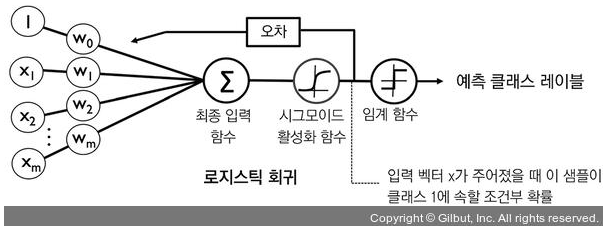

- 로지스틱 회귀 모델의 결정 경계
  - 로지스틱 회귀도 선형분리가 가능한 대상을 분리하는 알고리즘이므로 결정 경계가 직선임

  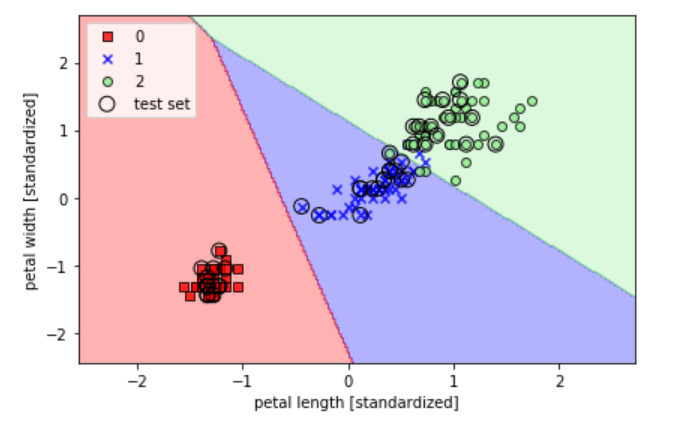

- 경계가 불명확하면서 두 개의 영역으로 나뉘어진 데이터를 로지스틱 회귀로 분류해보자

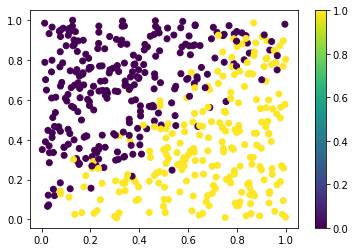

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_data = 500  # 데이터 수
X = np.zeros((n_data, 2))  # 입력
T = np.zeros((n_data))  # 정답

for i in range(n_data):
    # x、y좌표를 랜덤으로 설정한다
    x_rand = np.random.rand()  # x좌표
    y_rand = np.random.rand()  # y좌표
    X[i, 0] = x_rand
    X[i, 1] = y_rand
    
    # x가 y보다 큰 영역에서는 정답 라벨을 1로 한다. 경계는 정규분포를 사용해서 조금 불명료하게
    if x_rand > y_rand + 0.2*np.random.randn(): 
        T[i] = 1

plt.scatter(X[:, 0], X[:, 1], c=T)  # 정답 라벨을 색으로 나타낸다
plt.colorbar()
plt.show()

--- 확률 분포 ---


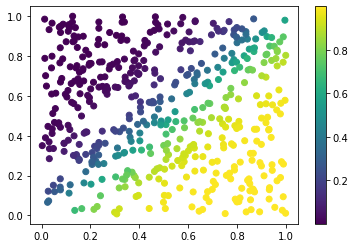

--- 오차의 추이 ---


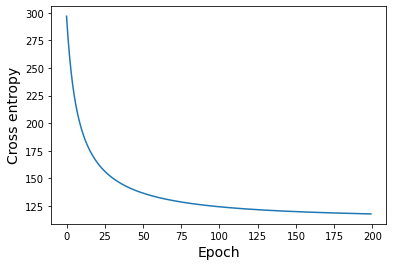

In [ ]:
eta = 0.01  # 학습계수

# --- 출력을 계산(분류를 시행한다) ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param  # (식4)
    return 1/(1+np.exp(-u))  #  (식4)

# --- 교차 엔트로피 오차 ---
def cross_entropy(Y, T):
    delta = 1e-7  # 미소한 값
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y+delta))  #  (식3)

# --- 각 파라미터의 구배 ---
def grad_a_params(X, T, a_params, b_param):  # a1, a2, ...의 구배
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):    
        for j in range(len(X)):    
            grad_a[i] += ( classify(X[j], a_params, b_param) - T[j] )*X[j, i]  # (식7)
    return grad_a
              
def grad_b_param(X, T, a_params, b_param):  # b의 구배
    grad_b = 0
    for i in range(len(X)):    
        grad_b += ( classify(X[i], a_params, b_param) - T[i] )  #  (식8)
    return grad_b

# --- 학습 ---
error_x = []  # 오차 기록용
error_y = []  # 오차 기록용
def fit(X, T, dim, epoch):  # dim: 입력의 차원 epoch: 반복하는 횟수
    
    # --- 파라미터의 초깃값을 설정 ---
    a_params = np.random.randn(dim)
    b_param = np.random.randn()
              
    # --- 파라미터 갱신 ---
    for i in range(epoch): 
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a  # （식2)
        b_param -= eta * grad_b  #（식2)
        
        Y = classify(X, a_params, b_param)
        error_x.append(i)  # 오차의 기록
        error_y.append(cross_entropy(Y, T))  # 오차의 기록

    return (a_params, b_param)

# --- 확률분포의 표시 --- 
a_params, b_param = fit(X, T, 2, 200)  # 학습
Y = classify(X, a_params, b_param)  # 학습 후의 파라미터를 사용한 분류
              
result_x = []  # x좌표
result_y = []  # y좌표
result_z = []  # 확률
for i in range(len(Y)):
    result_x.append(X[i, 0])
    result_y.append(X[i, 1])
    result_z.append(Y[i])

print("--- 확률 분포 ---")
plt.scatter(result_x, result_y, c=result_z)  # 확률을 색으로 표시
plt.colorbar()
plt.show()

# --- 오차의 추이 --- 
print("--- 오차의 추이 ---")
plt.plot(error_x, error_y)
plt.xlabel("Epoch", size=14)
plt.ylabel("Cross entropy", size=14)
plt.show()

- 실험 결과
  - 로지스틱 회귀는 결정 경계가 직선이지만 학습을 통해 오차를 줄여나감으로써 분류를 최적화할 수 있다.
  - 로지스틱 회귀의 분류 결과는 확률로 간주하여 처리하므로 영역이 뒤섞인 데이터의 경우에도 분류는 가능하다. 그러나 그래프를 보듯이 명확하게 떨어지지는 않는다.
  - 확률 값에 의해 분류는 가능하지만 서로 영역이 뒤섞인 데이터 때문에 오차는 0에 가까워지지 않는다.

- 로지스틱 회귀모형과 퍼셉트론의 차이
  - 활성화 함수가 다르다.
    - 퍼셉트론의 활성화 함수: 기본적으로 계단 함수를 사용함
    - 로지스틱 회귀모형의 활성화 함수: 시그모이드 함수
  - 손실함수의 여부
    - 퍼셉트론은 손실함수를 가지지 않는다. 퍼셉트론을 응용 및 활용한 다른 모델에서 각자의 손실함수를 지원한다.
    - 로지스틱 회귀모형의 손실함수는 교차 엔트로피 오차함수(Cross-Entropy Error Function)이며 규제항(Regularization Term)이 추가되어서 과적합을 방지할 수 있다.
  - 학습 방법
    - 퍼셉트론은 학습의 개념이 적용되지 않았다.
    - 로지스틱 회귀모형은 온라인 학습과 배치 학습에 모두 적용할 수 있다.

- 시그모이드 함수
  - 수 많은 자연 현상과 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 시그모이드 함수와 같은 S자 커브 형태를 지님
  - 시그모이드 함수의 정의: $y={1 \over {1+e^{-x}}}$
  - $x$의 값이 $+, -$로 아무리 커지거나 작아져도 $y$값은 항상 0과 1 사이의 값을 반환함
  - $x$값이 커지면 1에 근사하고 $x$값이 작아지면 0에 근사함. $x=0$일때는 $0.5$

  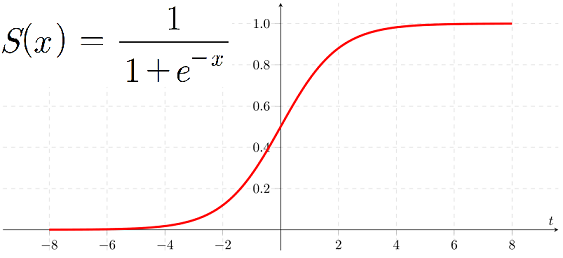

- 로지스틱 회귀의 사용 예
  - 종양의 크기에 따라 악성 종양인지(Yes=1) 그렇지 않은지(No=0) 분류 예측하기
  - 데이터: 위스콘신대 유방암 측정 데이터셋

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 데이터 로드
cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
# roc_auc: ROC Area Under the Curve
# roc: ROC Curve(Receiver-Operating Characteristic Curve). 특정 진단 방법의 민감도와 특이도가 어떤 관계를 갖고 변하는지 이차원 평면에 표현한 것
# auc: 
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


- roc_auc: ROC Area Under the Curve
  - ROC(Receiver-Operating Characteristic). 특정 진단 방법의 민감도와 특이도가 어떤 관계를 갖고 변하는지 이차원 평면에 표현한 것. 모든 임계값에서 분류 모델의 성능을 보여주는 그래프
  - AUC(Area Under the Curve): ROC 그래프의 아래 영역
  - AUC가 높다는 사실은 클래스를 구별하는 모델의 성능이 뛰어나다는 것을 의미함

  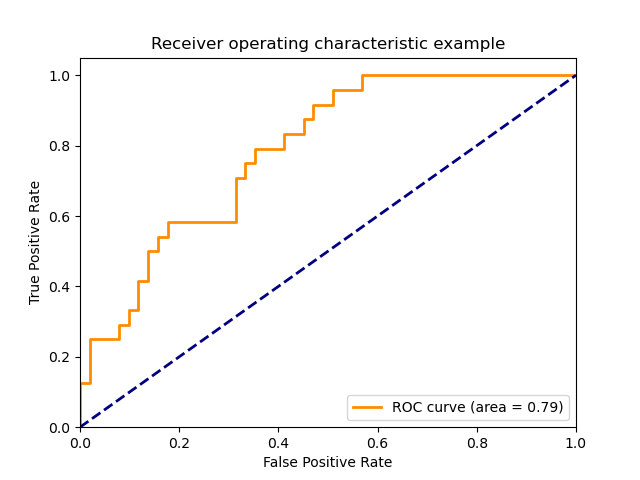

---
- 로지스틱 회귀는 가볍고 빠르며 이진 분류 예측성능이 뛰어나기 때문에 이진 분류의 기본 모델로 자주 사용됨
- 로지스틱 회귀는 희소 데이터 세트의 분류에 뛰어난 성능을 보이므로 텍스트 분류에서 자주 사용됨

## 3. 로지스틱 회귀를 이용한 분류
- forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타내어 비교해보자

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=1fcbe3c1f02b468334a8194255722c0f25e9b05ae70a79c414c63e5a79e5cf95
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


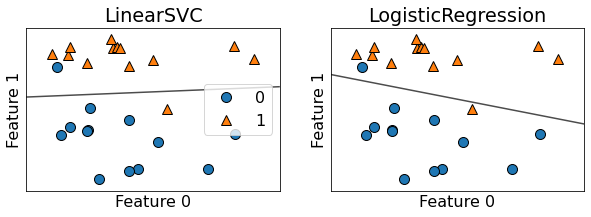

In [ ]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

- 위스콘신대 유방암 데이터의 분류 테스트
  - 규제의 강도를 결정하는 C의 값의 변화와 규제 종류(L1, L2)에 따른 결과 비교

In [ ]:
# 규제강도 C=1 (기본값), 규제종류 L2(기본값)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [ ]:
# 규제강도 C=100, 규제종류 L2(기본값)
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.965


In [ ]:
# 규제강도 C=0.01, 규제종류 L2(기본값)
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


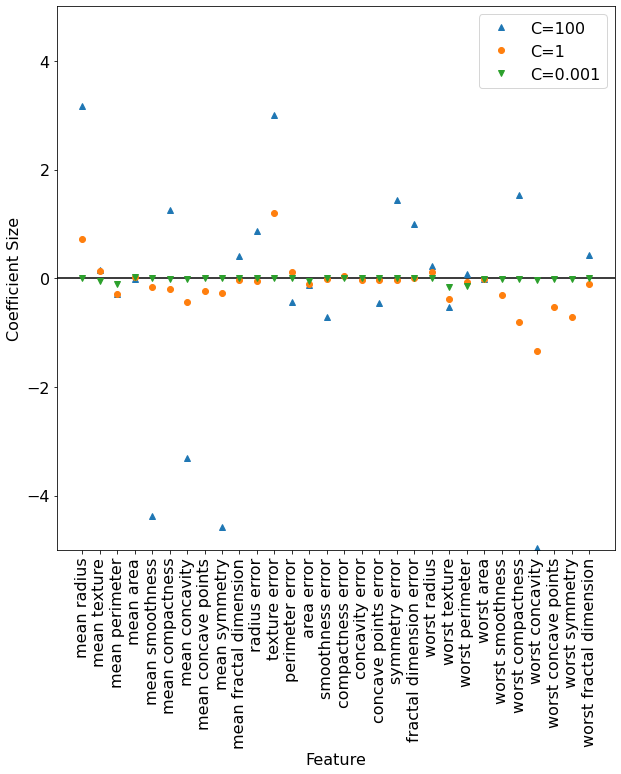

In [ ]:
# 각 규제강도에 따른 회귀계수의 크기 비교, 규제종류 L2(기본값)
plt.figure(figsize=(10, 10))
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient Size")
plt.legend()
plt.show()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


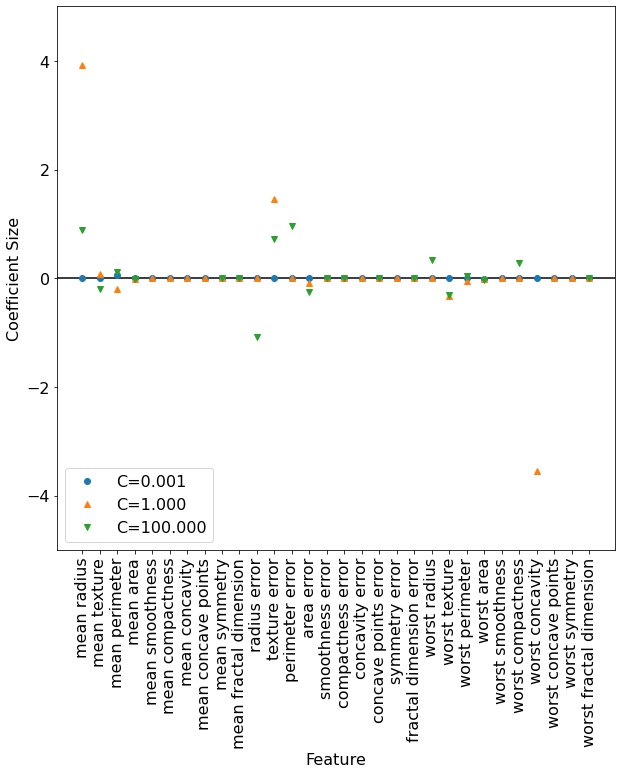

In [59]:
# 각 규제강도에 따른 회귀계수의 크기 비교, 규제종류 L1
plt.figure(figsize=(10, 10))

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient Size")

plt.ylim(-5, 5)
plt.legend(loc=3)

plt.show()

## 3. 희소 데이터
- 희소 데이터(sparse data)와 밀집 데이터(dense data)
  - 희소 데이터: 차원/전체 공간에 비해 데이터가 있는 공간이 매우 협소한 데이터
    - 예) 희소 행렬: \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 2 \\ 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 0\end{pmatrix}
  - 밀집 데이터: 차원/전체 공간에 비해 데이터가 공간을 매우 빽빽하게 가득 채우고 있는 데이터
####<br>
- 머신러닝에서는 매우 고차원의 데이터를 다루는 경우가 많으므로 데이터가 sparse(희소)해질 확률이 높음
- 희소 데이터를 가지고 학습을 실행할 경우 제대로 학습이 되지 않음
- 이런 이유로 해결하려는 문제에 따라 차원축소(Dimension Reduction) 과정 등을 통해서 데이터를 밀집데이터 형태로 만들 필요성이 있음

## 4. 다양한 학습 모델의 결정 경계 비교

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from numpy.random import normal as rnorm
from matplotlib.colors import ListedColormap

In [ ]:
plt.rcParams['font.size'] = 16

def plot_result(clf, clf_name, df, color = False):    
    X = df[['x','y']]
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=40)
    n_classes = len(Y.unique())
    if color == True:
        cm = plt.cm.RdBu
        plot_colors = "rbym"
    else:
        cm = plt.cm.Greys
        plot_colors = "wkym"
    plot_markers = "o^v*"
    plot_step = 0.02
    
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
    
    clf.fit(X_train,y_train)    
    score = clf.score(X_test, y_test)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cm,  alpha=.5)

    # 학습에 쓰인 데이터 점을 플로팅
    for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
        if color == True:
            plt.scatter(X[Y==i].x, X[Y==i].y, c=color, label=i, cmap=cm, marker=m, s=80)
        else:
            plt.scatter(X[Y==i].x, X[Y==i].y, facecolor=color, edgecolor='k', label=i, cmap=cm, marker=m, s=80)

    plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')        
    plt.title(clf_name)

In [ ]:
# 선형분리가능한 데이터의 예

from numpy.random import seed

seed(100)

N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=2.0, scale=0.5, size=(N,1)), 
                              rnorm(loc=2.0, scale=0.5, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=0.5, size=(N,1)), 
                              rnorm(loc=1.0, scale=0.5, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
df = pd.concat([p1, p2])

In [ ]:
# 선형분리가능하지 않은 데이터의 예(XOR 패턴)
N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
p3 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p3['label'] = 0
p4 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p4['label'] = 1
df_xor = pd.concat([p1,p2,p3,p4])

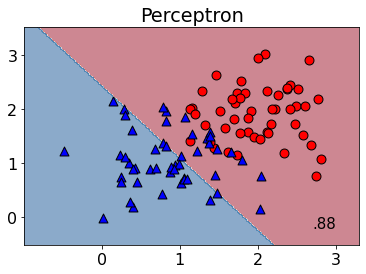

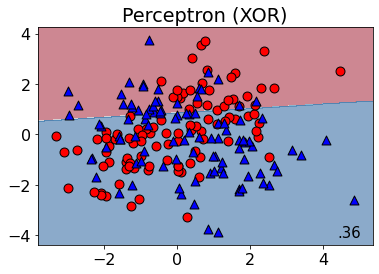

In [ ]:
# 퍼셉트론의 결정 경계
clf = Perceptron(max_iter=1000)

plot_result(clf, 'Perceptron', df, True)
plt.show()
plot_result(clf, 'Perceptron (XOR)', df_xor, True)

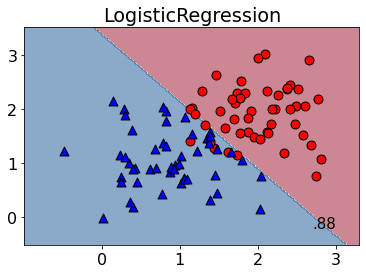

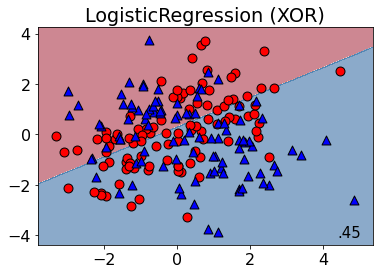

In [ ]:
# 로지스틱 회귀의 결정 경계
clf = LogisticRegression()
plot_result(clf, 'LogisticRegression', df, True)
plt.show()
plot_result(clf, 'LogisticRegression (XOR)', df_xor, True)

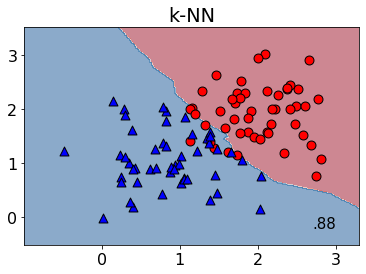

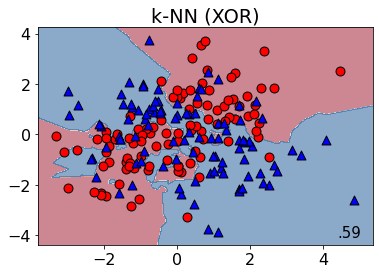

In [ ]:
# KNN 모델의 결정 경계
clf = KNeighborsClassifier(3)
plot_result(clf, 'k-NN', df, True)
plt.show()
plot_result(clf, 'k-NN (XOR)', df_xor, True)

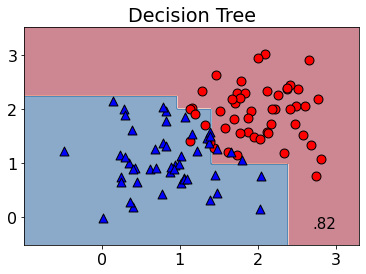

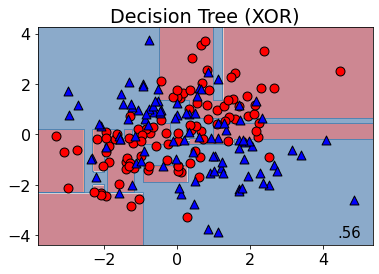

In [ ]:
# 의사결정트리의 결정 경계
clf = DecisionTreeClassifier()
plot_result(clf, 'Decision Tree', df, True)
plt.show()
plot_result(clf, 'Decision Tree (XOR)', df_xor, True)

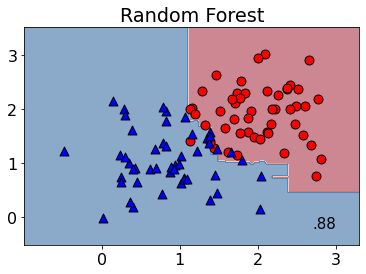

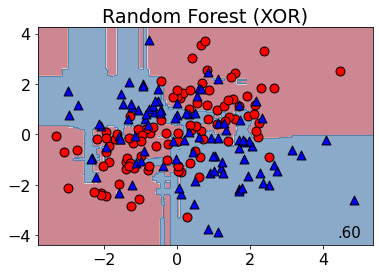

In [ ]:
# 랜덤 포레스트 모델의 결정 경계
clf = RandomForestClassifier()
plot_result(clf, 'Random Forest', df, True)
plt.show()
plot_result(clf, 'Random Forest (XOR)', df_xor, True)

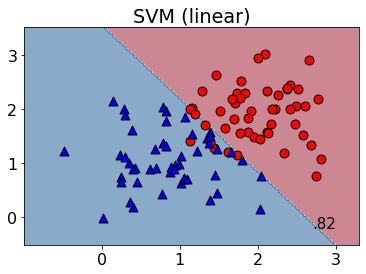

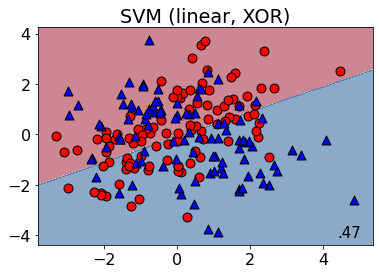

In [ ]:
# 서포트 벡터 머신(SVM)-선형 모델의 결정 경계
clf = SVC(kernel='linear')
plot_result(clf, 'SVM (linear)', df, True)
plt.show()
plot_result(clf, 'SVM (linear, XOR)', df_xor, True)

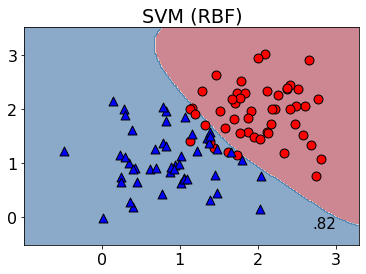

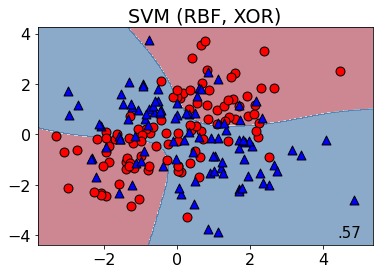

In [ ]:
# 서포트 벡터 머신(SVM)-비선형(RBF적용) 모델의 결정 경계
clf = SVC(kernel='rbf')
plot_result(clf, 'SVM (RBF)', df, True)
plt.show()
plot_result(clf, 'SVM (RBF, XOR)', df_xor, True)

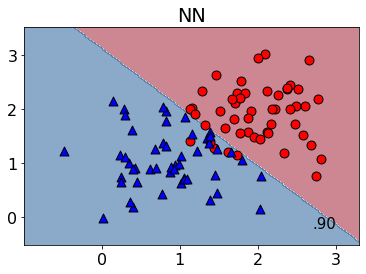

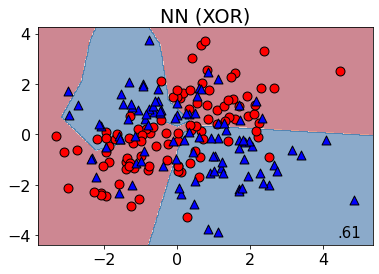

In [ ]:
# 신경망(Neural Network) 모델(Multi-Layer Perceptron)의 결정 경계
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.01,
                    hidden_layer_sizes=(5, 2), random_state=1)
plot_result(clf, 'NN', df, True)
plt.show()
plot_result(clf, 'NN (XOR)', df_xor, True)

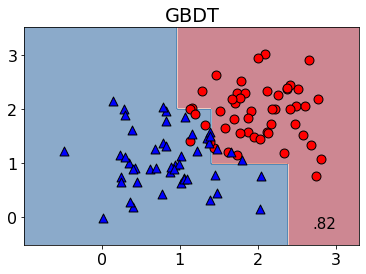

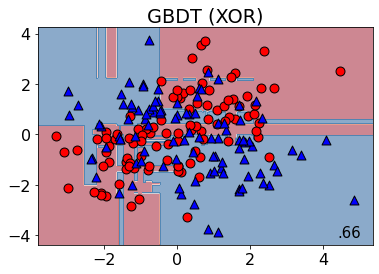

In [ ]:
# GBDT(그레디언트(경사, 기울기) 부스팅 회귀 트리) 모델의 결정 경계
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
plot_result(clf, 'GBDT', df, True)
plt.show()
plot_result(clf, 'GBDT (XOR)', df_xor, True)